In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 40.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 134 kB 47.5 MB/s 
     |████████████████████████████████| 10.4 MB 40.9 MB/s 
     |████████████████████████████████| 25.9 MB 54.1 MB/s 
     |████████████████████████████████| 262 kB 56.0 MB/s 
     |████████████████████████████████| 2.0 MB 49.0 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 167 kB 70.5 MB/s 
     |████████████████████████████████| 17.0 MB 36.2 MB/s 
     |████████████████████████████████| 1.3 MB 54.7 MB/s 
     |████████████████████████████████| 636 kB 54.4 MB/s 
     |██████████████████████████████

<font color='red'>런타임 재실행</font>

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
!pip install markupsafe==2.0.1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
import pandas as pd
from glob import glob
import numpy as np
from sklearn.metrics import classification_report
import os
from time import time
from pycaret.classification import *
from pycaret.utils import check_metric

# Load Data

In [6]:
files = glob("/content/drive/MyDrive/Colab Notebooks/maindata set/*knn3*predic(0,1)*.csv")

data_list = {}
for file in files:
    file_name = file.split('/')[-1].split('_')[0]
    print(file_name)
    data = pd.read_csv(file, encoding="cp949")
    data['생태통로_효율성'] = data['생태통로_효율성'].astype(int)
    data_list[file_name] = data
    
print("총 {}개의 파일을 불러왔습니다.\n".format(len(files)))

tunnel
overpass
총 2개의 파일을 불러왔습니다.



# Define func

In [8]:
def pycaret_setup(data_set, target_idx: str, random_seed) :
    clf = setup(data=data_set, target=str(target_idx), train_size=0.8, 
                fix_imbalance=True, use_gpu=True, feature_selection=True, 
                remove_multicollinearity=True, session_id=random_seed)

# Overpass

In [12]:
data_set = data_list['overpass'].drop('이용확인종_수', axis=1)
col_ls = list(data_set.columns)
target_idx = str(col_ls.index('생태통로_효율성'))

# 컬럼명 한글 오류
data_set.rename(columns={name: str(idx) for idx, name in enumerate(data_set.columns)}, 
                inplace = True)

# setup pycaret session
pycaret_setup(data_set, target_idx, 1)

,Description,Value
0,session_id,1
1,Target,0
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(300, 39)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,24
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='0',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                    n_jobs=-1, random_state=1,
              

## Find Best Model

In [13]:
compare_models(round = 3, sort = 'F1', errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.675,0.000,0.683,0.661,0.668,0.350,0.356,0.050
rf,Random Forest Classifier,0.675,0.708,0.657,0.686,0.663,0.350,0.358,0.965
lda,Linear Discriminant Analysis,0.671,0.690,0.675,0.658,0.661,0.341,0.348,0.039
qda,Quadratic Discriminant Analysis,0.475,0.492,0.983,0.479,0.644,-0.017,-0.042,0.028
et,Extra Trees Classifier,0.650,0.713,0.653,0.635,0.638,0.298,0.305,0.948
lightgbm,Light Gradient Boosting Machine,0.650,0.678,0.630,0.648,0.633,0.299,0.304,0.061
gbc,Gradient Boosting Classifier,0.638,0.705,0.640,0.627,0.629,0.275,0.280,0.159
dt,Decision Tree Classifier,0.629,0.628,0.622,0.611,0.611,0.255,0.256,0.027
ada,Ada Boost Classifier,0.621,0.666,0.614,0.619,0.608,0.243,0.252,0.133
nb,Naive Bayes,0.583,0.636,0.568,0.591,0.573,0.165,0.166,0.024


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1, solver='auto',
                tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=1, solver='auto',
                tol=0.001)

## model 생성 및 학습

In [73]:
overpass_rf = create_model('rf')
overpass_tune_rf = tune_model(overpass_rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4583,0.4375,0.6667,0.4706,0.5517,-0.0833,-0.0917
1,0.7500,0.8125,0.8333,0.7143,0.7692,0.5000,0.5071
2,0.5833,0.6597,0.8333,0.5556,0.6667,0.1667,0.1925
3,0.7083,0.7292,0.7500,0.6923,0.7200,0.4167,0.4181
4,0.7917,0.8819,0.9167,0.7333,0.8148,0.5833,0.6025
5,0.6667,0.7222,0.8333,0.6250,0.7143,0.3333,0.3536
6,0.7083,0.7622,0.7273,0.6667,0.6957,0.4167,0.4181
7,0.7083,0.5874,1.0000,0.6111,0.7586,0.4400,0.5311
8,0.7083,0.8182,1.0000,0.6111,0.7586,0.4400,0.5311


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.002,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=70, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


## plot result

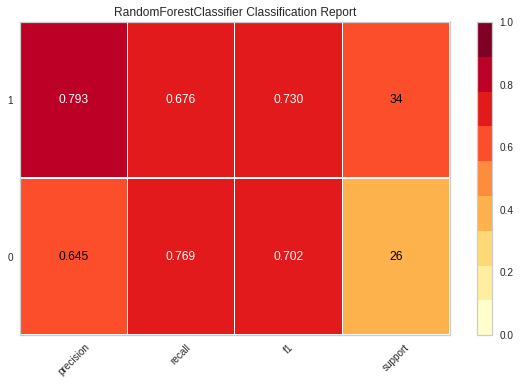

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [74]:
plot_model(overpass_rf, plot='class_report')

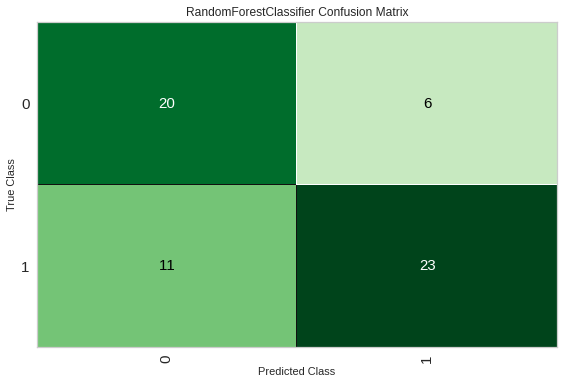

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [75]:
plot_model(overpass_rf, plot='confusion_matrix')

In [ ]:
# ㅇㅅㅇ;;
# plot_model(overpass_rf, plot='boundary')
# plot_model(overpass_rf, plot='auc')

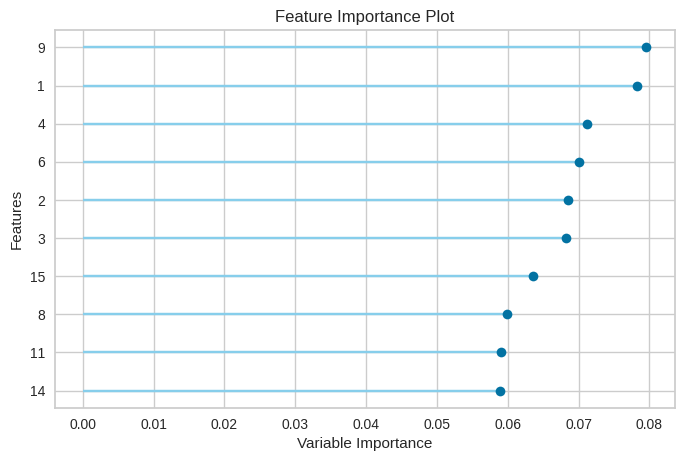

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [76]:
plot_model(overpass_rf, plot='feature')

In [77]:
overpass_rf.su

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# model save

## Inference

In [68]:
data_set.groupby('0').mean()

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,,,,,,,,,,,,,,,,,,,,,
0,14.236896,21.033286,76.140225,-0.022376,36.162787,555.359649,0.606667,0.919674,0.015179,3.40,...,0.266667,0.400000,0.093333,0.02,0.220000,0.606667,0.020000,0.12,0.2,0.053333
1,21.842415,29.459603,105.260371,0.145317,53.903879,769.376246,0.640000,1.186094,0.233008,3.58,...,0.393333,0.153333,0.120000,0.04,0.293333,0.520000,0.006667,0.14,0.3,0.033333


In [71]:
data_set[data_set['0']==0]

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
5,0,16.500000,42.700000,122.055124,0.074627,60.000000,1434.181414,1.0,0.120319,0.500000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0,24.500000,16.300000,125.516218,0.110617,60.000000,1248.795538,1.0,0.047211,0.077290,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13,0,40.000000,30.000000,207.715434,0.237741,80.000000,56.303251,1.0,1.817155,0.014395,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
17,0,61.600000,13.400000,275.125630,0.300000,60.000000,1773.704251,0.0,2.678674,0.107663,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18,0,40.300000,35.000000,179.827549,0.131547,80.000000,917.307870,1.0,4.632906,0.244908,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,-0.731097,-0.489871,-0.110631,-0.378729,-1.329024,2.232621,1.0,2.363062,-0.146966,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
295,0,-1.193759,-0.752461,0.279326,0.167536,-1.329024,2.232621,0.0,2.363062,0.071895,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,0,-0.546889,-0.626029,-0.438981,-1.005575,-1.329024,-0.654262,0.0,-1.008511,-0.963747,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297,0,-0.349829,-0.893481,-0.448911,-0.620393,0.265805,-0.228985,1.0,-0.810765,-0.659538,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
